# Test: a massa dei neutrini fissa faccio la regressione su $k$ e $z$

In [1]:
import os
import numpy as np
from pysr import *
from matplotlib import pyplot as plt
from importlib import reload
from classy import Class
import functions as f
import pandas as pd

In [2]:
nk = 50
nz = 10
filepath = 'files'

# valori fissi di massa del neutrino
mm = np.array([0.06, 1])
nm = len(mm)


#zz = np.load('files/redshift.npy')
#kk = np.load('files/scale.npy')
zz = np.linspace(0, 10, nz)
kk = np.logspace(-4, np.log10(3), nk)       # k è in h/Mpc

# Primo metodo

In [3]:
# la prima volta che si esegue questo notebook bisoagna far partire questa cella, così si è sicuri che i file vengano generati da class correttamente

cosmos = []
mu =  []
for i in range(nm) :
    cosmos.append(f.DataFromCLASS(nk, nz, mm[i], filepath))
    mu.append(cosmos[i]['growth_ratio'])
mu = np.array(mu)
print(mu.shape)


(2, 50, 10)


In [4]:
# se non è la prima volta che esegui questo notebook esegui questa cella, che carica i file già generati
'''
mu = []
for m in mm :
    mupath = 'files/Mu(k,z)_m-neu=' + str(round(m, 3)) + '.npy'
    mu.append(np.load(mupath))
mu = np.array(mu)
print(mu.shape)
'''

"\nmu = []\nfor m in mm :\n    mupath = 'files/Mu(k,z)_m-neu=' + str(round(m, 3)) + '.npy'\n    mu.append(np.load(mupath))\nmu = np.array(mu)\nprint(mu.shape)\n"

In [5]:
model_fix1 = PySRRegressor(
    binary_operators = ["+", "-", "*", "/", "^"],
    unary_operators=["exp", "log"],
    niterations=40,
    loss = "L2DistLoss()",
    model_selection = "best",
    equation_file = "models/model_fix1.csv"
    )

In [6]:
# creazione dei dati su cui allenare il modello

# controllino
if (len(mu[:,0,0]) != nm) :
    print('Error! dim(Mu[:,0,0]) ≠ dim(mass)')
elif (len(mu[0,:,0]) != nk) :
    print('Error! dim(Mu[0,:,0]) ≠ dim(scale)')
elif (len(mu[0,0,:]) != nz) :
    print('Error! dim(Mu[0,:,0]) ≠ dim(redshift)')

data = np.zeros([nm*nk*nz, 4])
for m in range(nm) :
    for k in range(nk) :
        for z in range(nz) :
            data[m+k+z,0] = mm[m]
            data[m+k+z,1] = kk[k]
            data[m+k+z,2] = zz[z]
            data[m+k+z,3] = mu[m,k,z]

            # print(data[m+k+z,0], '\t', data[m+k+z,1], '\t', data[m+k+z,2], '\t', data[m+k+z,3])

# l'array 'data' è così strutturato:
# masse neutrino | k (scala) | redshift | valore di mu

In [7]:
x1 = []
x1.append(data[:nk*nz, 1:])
x1.append(data[nk*nz:, 1:])

In [8]:
# alleno il modello per due valori distinti di massa del neutrino
pred1 = []

# m = 0.06 eV
model_fix1.fit(x1[0][:,:1], x1[0][:,2])
pred1.append(model_fix1.predict(x1[0][:,:1]))

# m = 1 eV
model_fix1.fit(x1[1][:,:1], x1[1][:,2])
pred1.append(model_fix1.predict(x1[1][:,:1]))

Compiling Julia backend...


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:60: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Started!

Expressions evaluated per second: 1.670e+05
Head worker occupation: 8.0%
Progress: 249 / 600 total iterations (41.500%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.055e-01  1.594e+01  y = 0.11996
3           9.583e-08  6.894e+00  y = (x₀ ^ 8.5608e-05)
5           6.909e-08  1.636e-01  y = (x₀ ^ (0.0019056 ^ 3.699))
7           3.210e-08  3.833e-01  y = ((x₀ ^ 0.00020381) ^ (0.00020381 - x₀))
9           1.311e-08  4.476e-01  y = ((x₀ ^ 0.00020381) ^ (0.00020381 - (x₀ * x₀)))
11          1.240e-08  2.807e-02  y = (x₀ ^ ((0.00020381 ^ 1.0284) * (0.14084 - (x₀ * x₀))))
12          1.047e-08  1.687e-01  y = ((x₀ ^ (8.5608e-05 - (x₀ ^ (exp(1.1613) - 0.49303)))) ^ 8....
                                  5608e-05)
17          1.033e-08  2.630e-03  y = (((((x₀ / 0.67806) ^ (1.5938 - x₀)) ^ 0.017102) ^ ((0.0171...
                                  02 * 0.3923) 

/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:60: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Started!


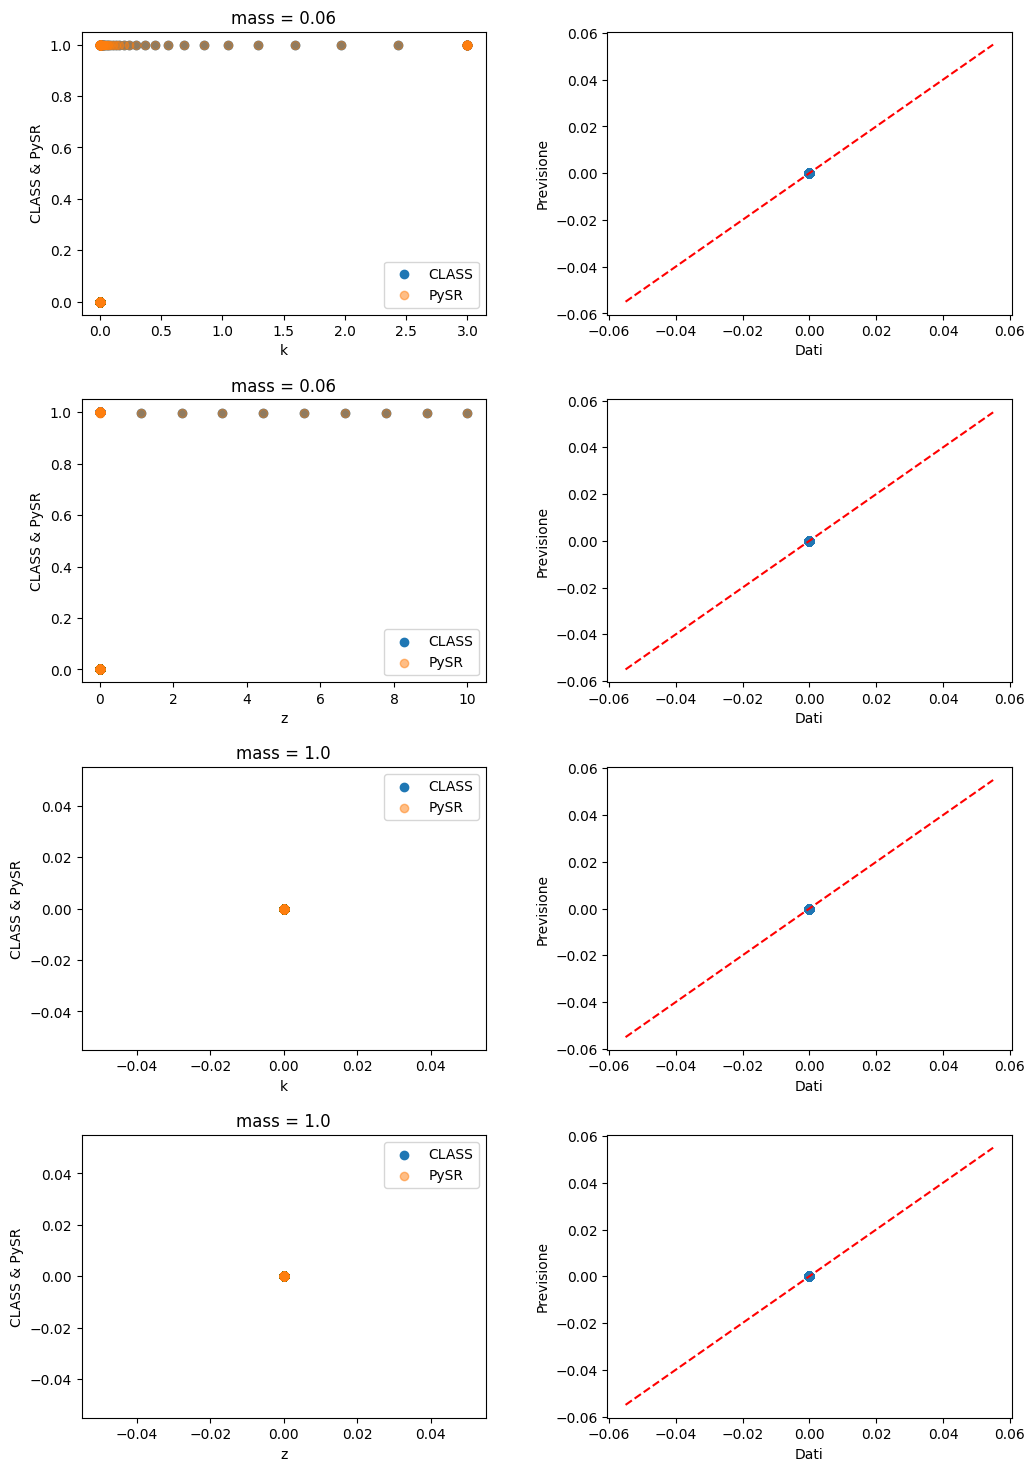

In [9]:
# plotto le predizioni di PySR contro i dati di CLASS

fig, axs = plt.subplots(4, 2, figsize=(12, 18), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

j = 0
for m in range(nm) :
    # x: scala
    axs[j,0].scatter(x1[m][:,0], x1[m][:,2], label='CLASS')
    axs[j,0].scatter(x1[m][:,0], pred1[m][:], alpha=0.5, label='PySR')
    axs[j,0].set_xlabel('k')
    axs[j,0].set_ylabel('CLASS & PySR')
    axs[j,0].set_title('mass = ' + str(mm[m]))
    axs[j,0].legend()

    j = j+1

    # x: redshift
    axs[j,0].scatter(x1[m][:,1], x1[m][:,2], label='CLASS')
    axs[j,0].scatter(x1[m][:,1], pred1[m][:], alpha=0.5, label='PySR')
    axs[j,0].set_xlabel('z')
    axs[j,0].set_ylabel('CLASS & PySR')
    axs[j,0].set_title('mass = ' + str(mm[m]))
    axs[j,0].legend()

    j = j+1

for i in range(4) :
    axs[i,1].plot(x1[m][:,2], pred1[m][:], 'o')
    xlim = axs[i,1].get_xlim()
    t = np.arange(xlim[0], xlim[1]+0.01, 0.01)
    axs[i,1].plot(t, t, linestyle='--', color='red')
    axs[i,1].set_xlabel('Dati')
    axs[i,1].set_ylabel('Previsione')

plt.savefig('prova1.pdf')
plt.show()

# Secondo metodo

In [10]:
m_vals = np.zeros(nm*nk*nz)
k_vals = np.zeros(nm*nk*nz)
z_vals = np.zeros(nm*nk*nz)
mu_vals = np.zeros(nm*nk*nz)

In [11]:
i = 0
m_vals = np.zeros(nm*nk*nz)
k_vals = np.zeros(nm*nk*nz)
z_vals = np.zeros(nm*nk*nz)
mu_vals = np.zeros(nm*nk*nz)

for m in mm :

    LCDM = Class()
    LCDM.set({'omega_b': 0.02238280, 
        'omega_cdm': 0.1201075, 
        'h': 0.67810, 
        'A_s': 2.100549e-09, 
        'n_s':0.9660499, 
        'tau_reio':0.05430842, 
        'z_max_pk':10,
        'N_ncdm': 1,
        'm_ncdm': m          # massa del neutrino in eV
    })
    LCDM.set({'output': 'tCl,pCl,lCl,mPk',
    'lensing':'yes',
    'P_k_max_h/Mpc': 10, 
    'z_max_pk': 10})
    LCDM.compute()
    h = LCDM.h()

    for k in kk :
        pk0 = LCDM.pk_lin(k, 0)*(h**3)
        dz0 = LCDM.scale_independent_growth_factor(0)

        for z in zz :
            m_vals[i] = m
            k_vals[i] = k
            z_vals[i] = z

            pkz = LCDM.pk_lin(k, z)*(h**3)
            dkz = np.sqrt(pkz/pk0)
            dz = LCDM.scale_independent_growth_factor(z)
            mu_vals[i] = dkz / (dz/dz0)

            i = i+1

values = {'mass [eV]': m_vals, 'k [1/Mpc]': k_vals, 'z': z_vals, 'Mu': mu_vals}
df = pd.DataFrame(values)
df.to_csv('data_test.csv')


In [12]:
model_fix2 = PySRRegressor(
    binary_operators = ["+", "-", "*", "/", "^"],
    unary_operators=["exp", "log"],
    niterations=40,
    loss = "L2DistLoss()",
    model_selection = "best",
    equation_file = "models/model_fix2.csv"
    )

In [13]:
data = np.array(df)
x2 = []
x2.append(data[:nk*nz, 1:])
x2.append(data[nk*nz:, 1:])


In [14]:
# alleno il modello per due valori distinti di massa del neutrino
pred2 = []

# m = 0.06 eV
model_fix2.fit(x2[0][:,:1], x2[0][:,2])
pred2.append(model_fix2.predict(x2[0][:,:1]))

# m = 1 eV
model_fix2.fit(x2[1][:,:1], x2[1][:,2])
pred2.append(model_fix2.predict(x2[1][:,:1]))

/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:60: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Started!

Expressions evaluated per second: 1.880e+05
Head worker occupation: 4.8%
Progress: 417 / 600 total iterations (69.500%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.036e-05  1.594e+01  y = 0.99755
3           4.661e-06  3.993e-01  y = (x₀ ^ 0.00068599)
5           4.432e-06  2.524e-02  y = ((x₀ ^ 0.00082467) + 0.00082467)
6           4.201e-06  5.336e-02  y = (x₀ ^ (0.00069131 ^ exp(x₀)))
8           4.061e-06  1.701e-02  y = (x₀ ^ (0.00069131 ^ (exp(2.0553) ^ x₀)))
9           4.001e-06  1.475e-02  y = (x₀ ^ (0.00069131 ^ (exp(exp(1.347)) ^ x₀)))
10          3.897e-06  2.646e-02  y = (x₀ ^ (exp(-7.1682) ^ (exp(exp(2.0553)) ^ x₀)))
11          3.883e-06  3.485e-03  y = (x₀ ^ (exp(-7.1682) ^ ((exp(x₀) / x₀) ^ x₀)))
12          3.872e-06  2.855e-03  y = ((x₀ ^ 0.11649) ^ ((0.26423 * (-0.0033142 * log(x₀))) / 1....
                                  0345))


/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1793: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:1261: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/pysr/sr.py:60: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://astroautomata.com/PySR/tuning/
  warnings.warn(


Started!

Expressions evaluated per second: 1.160e+05
Head worker occupation: 4.0%
Progress: 246 / 600 total iterations (41.000%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           9.671e-04  1.594e+01  y = 0.95609
2           9.671e-04  -0.000e+00  y = exp(-0.044917)
3           7.647e-04  2.348e-01  y = (x₀ ^ 0.0095177)
4           7.646e-04  1.413e-04  y = (1.0095 ^ log(x₀))
5           5.474e-04  3.342e-01  y = (0.93568 ^ (0.057067 ^ x₀))
6           5.361e-04  2.077e-02  y = (exp(0.089748 ^ x₀) ^ -0.058228)
7           5.320e-04  7.855e-03  y = (0.95608 ^ (0.064615 ^ (x₀ - 0.10948)))
9           5.319e-04  6.652e-05  y = (0.95609 ^ ((0.064615 / 1.0345) ^ (x₀ - 0.10948)))
12          5.317e-04  9.417e-05  y = (exp(((0.068191 * 0.75015) ^ x₀) - (-0.058228 / 1.1114)) ^...
                                   -0.058228)
14          5.317e-04  5.910e-05  y = (exp(((0.06819

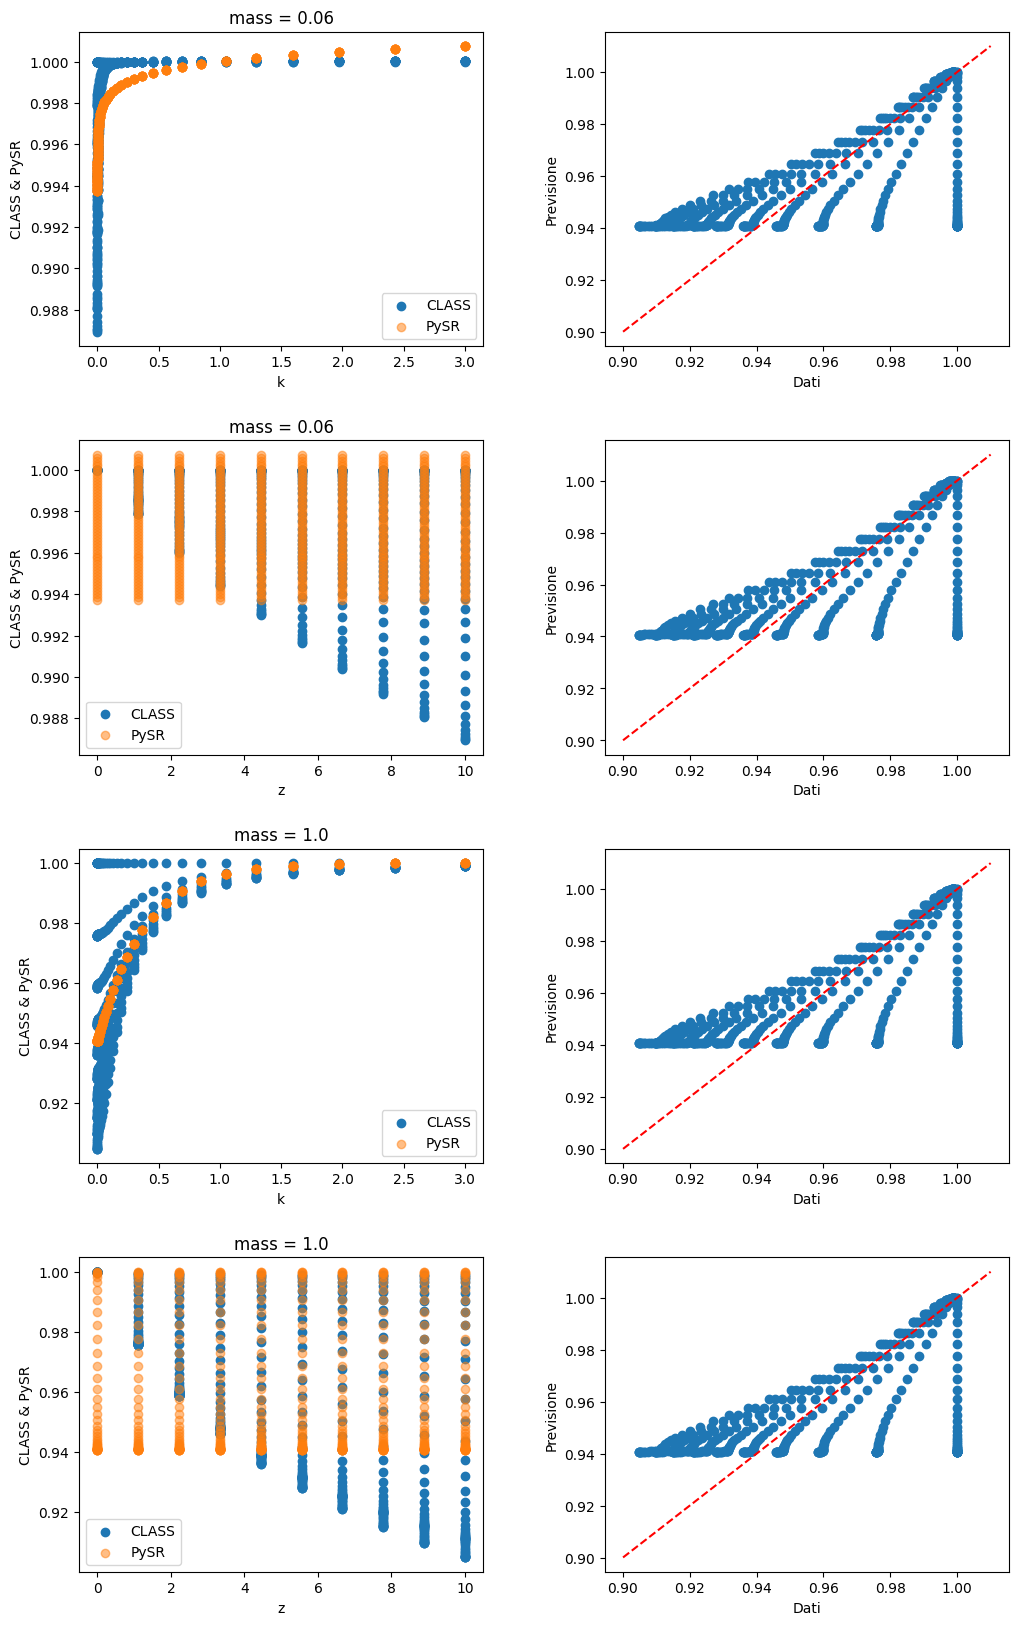

In [15]:
# plotto le predizioni di PySR contro i dati di CLASS

fig, axs = plt.subplots(4, 2, figsize=(12, 20), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

j = 0
for m in range(nm) :
    # x: scala
    axs[j,0].scatter(x2[m][:,0], x2[m][:,2], label='CLASS')
    axs[j,0].scatter(x2[m][:,0], pred2[m][:], alpha=0.5, label='PySR')
    axs[j,0].set_xlabel('k')
    axs[j,0].set_ylabel('CLASS & PySR')
    axs[j,0].set_title('mass = ' + str(mm[m]))
    axs[j,0].legend()

    j = j+1

    # x: redshift
    axs[j,0].scatter(x2[m][:,1], x2[m][:,2], label='CLASS')
    axs[j,0].scatter(x2[m][:,1], pred2[m][:], alpha=0.5, label='PySR')
    axs[j,0].set_xlabel('z')
    axs[j,0].set_ylabel('CLASS & PySR')
    axs[j,0].set_title('mass = ' + str(mm[m]))
    axs[j,0].legend()

    j = j+1

for i in range(4) :
    axs[i,1].plot(x2[m][:,2], pred2[m][:], 'o')
    xlim = axs[i,1].get_xlim()
    t = np.arange(xlim[0], xlim[1]+0.01, 0.01)
    axs[i,1].plot(t, t, linestyle='--', color='red')
    axs[i,1].set_xlabel('Dati')
    axs[i,1].set_ylabel('Previsione')

plt.savefig('prova2.pdf')
plt.show()